# Water Mass Trajectory Visuals

Jones-Kellett et al : 
- Figures to generate Video S1 (stitched togerther in `animate_trajs.py`)
- Fig 4 : Coherence plot with examples
- Supp Fig : Geostrophy (CMEMS) vs. Geostrophy + Ekman (OSCAR) trajectories

_____


NOTES: 
- Cleaning up code from `G4_AVISO_eddies.ipynb`. Using environment py3_parcels_v2 on cluster.


LJK 

Date created: 08/11/25

Last edited: 08/28/25


In [1]:
import csv
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.path import Path
from IPython.display import Image

from config import *

In [2]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [3]:
metadata_df = pd.read_csv(data_dir  + 'AVISO_eddies/AVISO_metadata_15km_near_eddy.csv',index_col=0)
metadata_df = metadata_df[12:] # sample 16 & later
metadata_df.head()

sample_id      date time_UTC  latitude  longitude  in_anti  near_anti  \
14        16  20211120    10:54   29.0000   236.5574        0          0   
15        17  20211120    12:44   28.7390   236.1088        0          0   
16        18  20211120    14:43   28.5030   235.7140        0          0   
17        19  20211121    02:03   28.2847   235.3517        0          0   
18        20  20211121    04:04   28.0397   234.9534        0          0   

    in_cyc  near_cyc  
14       0         0  
15       0         0  
16       0         0  
17       0         0  
18       0         0

### Trajectory supplement

Making a video of the sample sites one at a time with their trajectories; animation generated in `animate_trajs.py`

In [4]:
ADT_avg = np.load(data_dir + '../NP_2000_to_2020/CMEMS_data/CMEMS_adt_2000_to_2019_avg.npy') # used for the background of trajectory plots

In [8]:
sample_sla = xr.open_dataset(data_dir + '../NP_2000_to_2020/CMEMS_data/dt_global_allsat_phy_l4_20191231.nc')

In [9]:
def cmems_traj_plot(a,sample_site,skip,day_cutoff,cmap):
    """
    a: axis
    sample_site: string
    skip: determines number of trajectories to plot; e.g., skip = 10 will plot 100 trajs
    day_cutoff: how many days to plot?
    cmap: color scheme
    """

    cmems_file_path = data_dir + 'parcels_trajs/gaussian_seeding_sample_sites/CMEMS_runs/samplesite%s_200day_backward_runtime_20min_timestep_6hr_output_freq_1000_gaussian_particles_0.025_std_dist_cmems.nc'%(sample_site)
    cmems_ds = xr.open_dataset(cmems_file_path)

    traj_lats,traj_lons,traj_times = [],[],[]
    for i in np.arange(0,len(cmems_ds.lat),skip):
        traj_lats.append(np.array(cmems_ds.lat[i])[:(day_cutoff*4)+1]) 
        traj_lons.append(np.array(cmems_ds.lon[i])[:(day_cutoff*4)+1])
        if i == 0: # times are the same for the set of trajs
            traj_times = np.array(cmems_ds.time[i])[:(day_cutoff*4)+1]
            

    # Create figure
    for l in np.arange(0,len(traj_lats)):
        plot = a.scatter(traj_lons[l],traj_lats[l],c=np.arange(0,day_cutoff,day_cutoff/len(traj_times)),
                         s=0.5,cmap=cmap,zorder=2)

    a.set_ylabel('Latitude')
    a.set_xlabel('Longitude')

    a.grid(True) # Turn on grid lines
    a.set_axisbelow(True) # send them to the back
    
    buffer = 0.2
    lat_lims = [np.nanmin(traj_lats)-buffer,np.nanmax(traj_lats)+buffer]
    lon_lims = [np.nanmin(traj_lons)-buffer,np.nanmax(traj_lons)+buffer]
    
    return plot,lat_lims,lon_lims

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

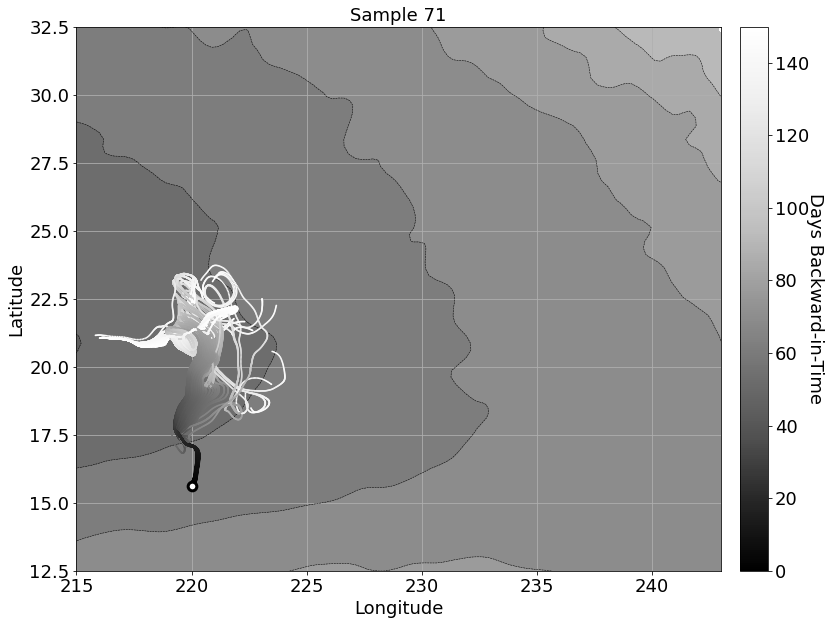

In [10]:
linewidth = 3
scat_size_norm = 75
scat_zorder = 3

for index, row in metadata_df.iterrows(): # iterate through sample points
    
    plt.clf()
    fig,ax = plt.subplots(1,1,figsize=(14,10))
    
    ######################## Background: ADT ########################
    ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
    adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)

    if (row.in_anti != 0):
        scat_col = 'firebrick'
        cmap = 'Reds_r'
        marker = 's'
        scat_size = scat_size_norm
        
    elif (row.near_anti != 0):
        scat_col = 'lightcoral'
        cmap = 'Reds_r'
        marker = '^'
        scat_size = scat_size_norm+50
        
    elif (row.in_cyc != 0):
        scat_col = 'mediumblue'
        cmap = 'Blues_r'
        marker = 's'
        scat_size = scat_size_norm
        
    elif (row.near_cyc != 0):
        scat_col = 'cornflowerblue'
        cmap = 'Blues_r'
        marker = '^'
        scat_size = scat_size_norm+50
        
    else:
        scat_col = 'k'
        cmap = 'Greys_r'
        marker = 'o'
        scat_size = scat_size_norm
        
    ######################## Sample Points ########################
    ax.scatter(row.longitude,row.latitude,c='white',edgecolor=scat_col,
               linewidth=linewidth,s=scat_size,marker=marker,zorder=scat_zorder)
    
    ######################## TRAJECTORIES ########################
    plot,_,_ = cmems_traj_plot(ax,str(row.sample_id),1,150,cmap)

    cbar = plt.colorbar(plot,ax=ax,pad=0.025)
    cbar.set_label('Days Backward-in-Time',rotation=270,labelpad=15)
    
    #Figure params
    ax.set_title('Sample %s'%(row.sample_id))
    ax.set_xlim([215,243])
    ax.set_ylim([12.5,32.5])
    
#    anim_dir = data_dir + 'G4_traj_paper_figs/traj_animation/'
#    plt.savefig(anim_dir + 'Sample_%s_150d_traj.png'%(row.sample_id),bbox_inches='tight',pad_inches=0,dpi=350)

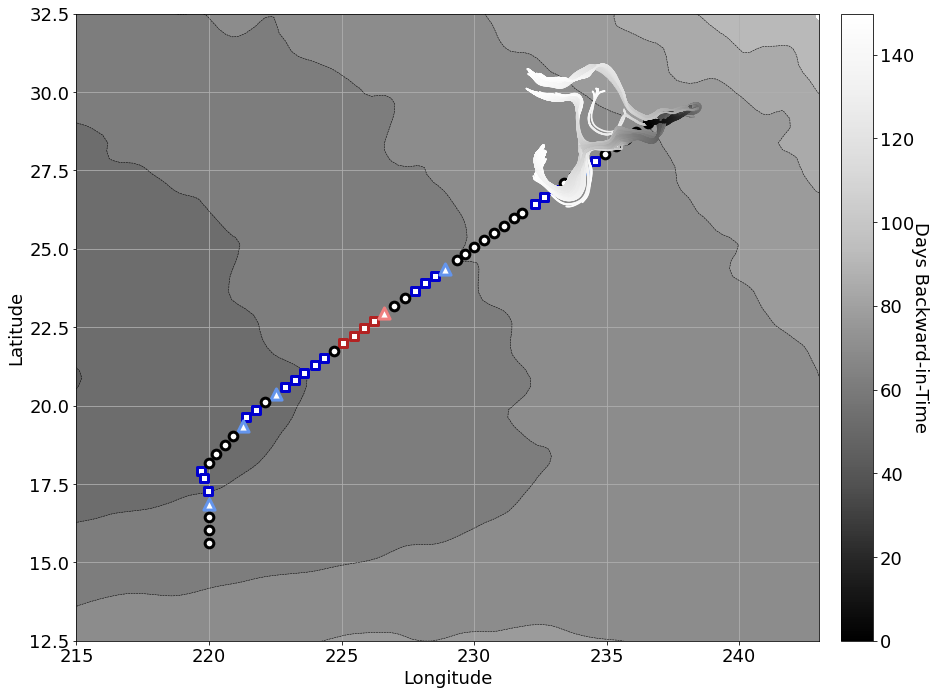

In [11]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
#ax.set_facecolor('honeydew')

######################## Sample Points ########################

linewidth = 3
scat_size = 75
scat_zorder = 2
ax.scatter([float(i) for i in metadata_df[metadata_df["in_anti"].ne(0)]["longitude"].tolist()],
           [float(i) for i in metadata_df[metadata_df["in_anti"].ne(0)]["latitude"].tolist()],
          c='white',edgecolor='firebrick',linewidth=linewidth,s=scat_size,marker='s',label='In Anticyclone',zorder=scat_zorder)

ax.scatter([float(i) for i in metadata_df[metadata_df["near_anti"].ne(0)]["longitude"].tolist()],
           [float(i) for i in metadata_df[metadata_df["near_anti"].ne(0)]["latitude"].tolist()],
          c='white',edgecolor='lightcoral',linewidth=linewidth,s=scat_size+50,marker='^',label='Near Anticyclone',zorder=scat_zorder)

ax.scatter([float(i) for i in metadata_df[metadata_df["in_cyc"].ne(0)]["longitude"].tolist()],
           [float(i) for i in metadata_df[metadata_df["in_cyc"].ne(0)]["latitude"].tolist()],
          c='white',edgecolor='mediumblue',linewidth=linewidth,s=scat_size,marker='s',label='In Cyclone',zorder=scat_zorder)

ax.scatter([float(i) for i in metadata_df[metadata_df["near_cyc"].ne(0)]["longitude"].tolist()],
           [float(i) for i in metadata_df[metadata_df["near_cyc"].ne(0)]["latitude"].tolist()],
          c='white',edgecolor='cornflowerblue',linewidth=linewidth,s=scat_size+50,marker='^',label='Near Cyclone',zorder=scat_zorder)

ax.scatter([float(i) for i in metadata_df[metadata_df["near_cyc"].eq(0) & metadata_df["near_anti"].eq(0) & metadata_df["in_cyc"].eq(0) & metadata_df["in_anti"].eq(0)]["longitude"].tolist()],
           [float(i) for i in metadata_df[metadata_df["near_cyc"].eq(0) & metadata_df["near_anti"].eq(0) & metadata_df["in_cyc"].eq(0) & metadata_df["in_anti"].eq(0)]["latitude"].tolist()],
            c='white',edgecolor='k',linewidth=linewidth,s=scat_size,label='Outside Eddy',zorder=scat_zorder)
    
######################## TRAJECTORIES ########################
plot,lat_lims,lon_lims = cmems_traj_plot(ax,'16',1,150,'Greys_r')

cbar = plt.colorbar(plot,ax=ax,pad=0.025)
cbar.set_label('Days Backward-in-Time',rotation=270,labelpad=15)

ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)

#Figure params
ax.set_xlim([215,243])
ax.set_ylim([12.5,32.5])
#plt.legend(loc='upper left')
plt.tight_layout()

### Coherence Plot

Adapting from `G4_Lagrangian_plots_for_thesis.ipynb`

In [17]:
coh_df = pd.read_csv(data_dir + 'parcels_trajs/gaussian_seeding_sample_sites/CMEMS_coherence_time_by_run.csv',index_col=0)
coh_df.head()

cmems_run0  cmems_run1  cmems_run2  cmems_run3
sample_id                                                
16                132         132         128         131
17                176         174         174         174
18                162         159         161         160
19                390         387         388         388
20                255         255         251         258

In [18]:
mean_coh = np.nanmean([coh_df.cmems_run0,coh_df.cmems_run1,coh_df.cmems_run2],axis=0)

In [19]:
coh_df['mean_coh'] = mean_coh

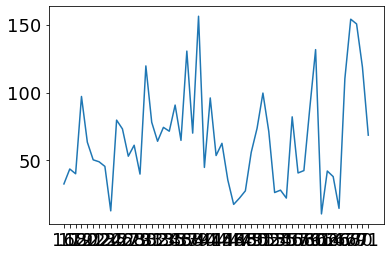

In [20]:
plt.plot(np.divide(coh_df['mean_coh'],4)) # convert to days

In [21]:
def cmems_traj_plot_w_coh(a,sample_site,skip,day_cutoff,cmap):
    """
    Same as cmems_traj_plot, except adds an indicator of loss of coherence
    
    a: axis
    sample_site: string
    skip: determines number of trajectories to plot; e.g., skip = 10 will plot 100 trajs
    day_cutoff: how many days to plot?
    cmap: color scheme
    """

    cmems_file_path = data_dir + 'parcels_trajs/gaussian_seeding_sample_sites/CMEMS_runs/samplesite%s_200day_backward_runtime_20min_timestep_6hr_output_freq_1000_gaussian_particles_0.025_std_dist_cmems.nc'%(sample_site)
    cmems_ds = xr.open_dataset(cmems_file_path)

    traj_lats,traj_lons,traj_times = [],[],[]
    for i in np.arange(0,len(cmems_ds.lat),skip):
        traj_lats.append(np.array(cmems_ds.lat[i])[:(day_cutoff*4)+1]) 
        traj_lons.append(np.array(cmems_ds.lon[i])[:(day_cutoff*4)+1])
        if i == 0: # times are the same for the set of trajs
            traj_times = np.array(cmems_ds.time[i])[:(day_cutoff*4)+1]
            
    # Create figure
    for l in np.arange(0,len(traj_lats)):
        plot = a.scatter(traj_lons[l],traj_lats[l],c=np.arange(0,day_cutoff,day_cutoff/len(traj_times)),
                         s=0.5,cmap=cmap,zorder=10)
        
    # Add indicator of coherence time
    coh_ind = int(np.divide(coh_df.loc[sample_site].mean_coh,skip))
    for l in np.arange(0,len(traj_lats)):
        a.scatter(traj_lons[l][coh_ind],traj_lats[l][coh_ind],c='#ff8533',zorder=100,marker='X',s=30,edgecolor='k',linewidth=0.1)
    
    # PARAMS
    a.set_ylabel('Latitude')
    a.set_xlabel('Longitude')

    a.grid(True) # Turn on grid lines
    a.set_axisbelow(True) # send them to the back
    
    buffer = 0.2
    lat_lims = [np.nanmin(traj_lats)-buffer,np.nanmax(traj_lats)+buffer]
    lon_lims = [np.nanmin(traj_lons)-buffer,np.nanmax(traj_lons)+buffer]
    
    return plot,lat_lims,lon_lims

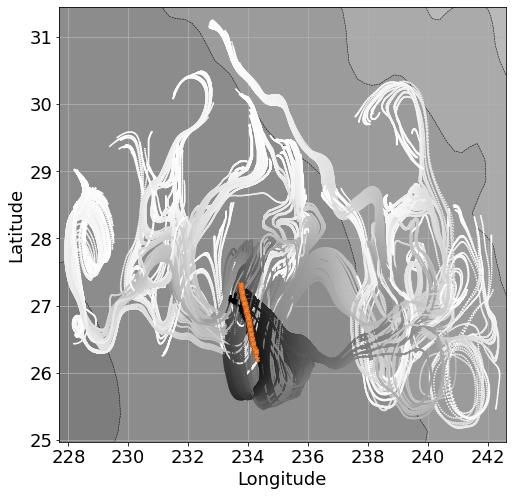

In [22]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plot,lat_lims,lon_lims = cmems_traj_plot_w_coh(ax,'24',1,200,'Greys_r')
ax.set_xlim(lon_lims)
ax.set_ylim(lat_lims)

ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)

plt.show()

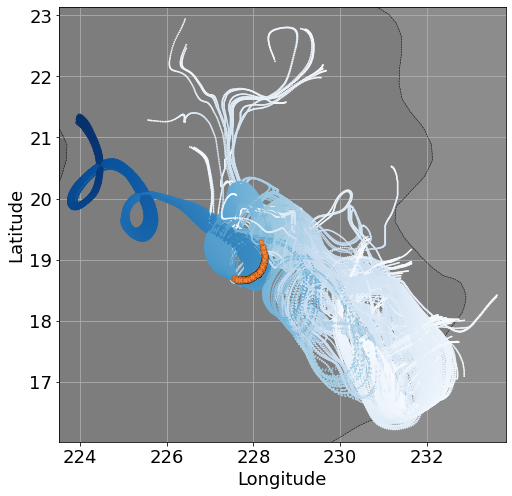

In [23]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plot,lat_lims,lon_lims = cmems_traj_plot_w_coh(ax,'50',1,200,'Blues_r')
ax.set_xlim(lon_lims)
ax.set_ylim(lat_lims)

ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)

plt.show()

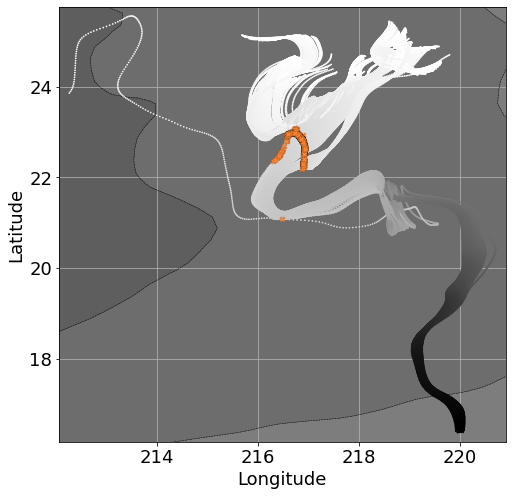

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plot,lat_lims,lon_lims = cmems_traj_plot_w_coh(ax,'69',1,200,'Greys_r')
ax.set_xlim(lon_lims)
ax.set_ylim(lat_lims)

ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)

plt.show()

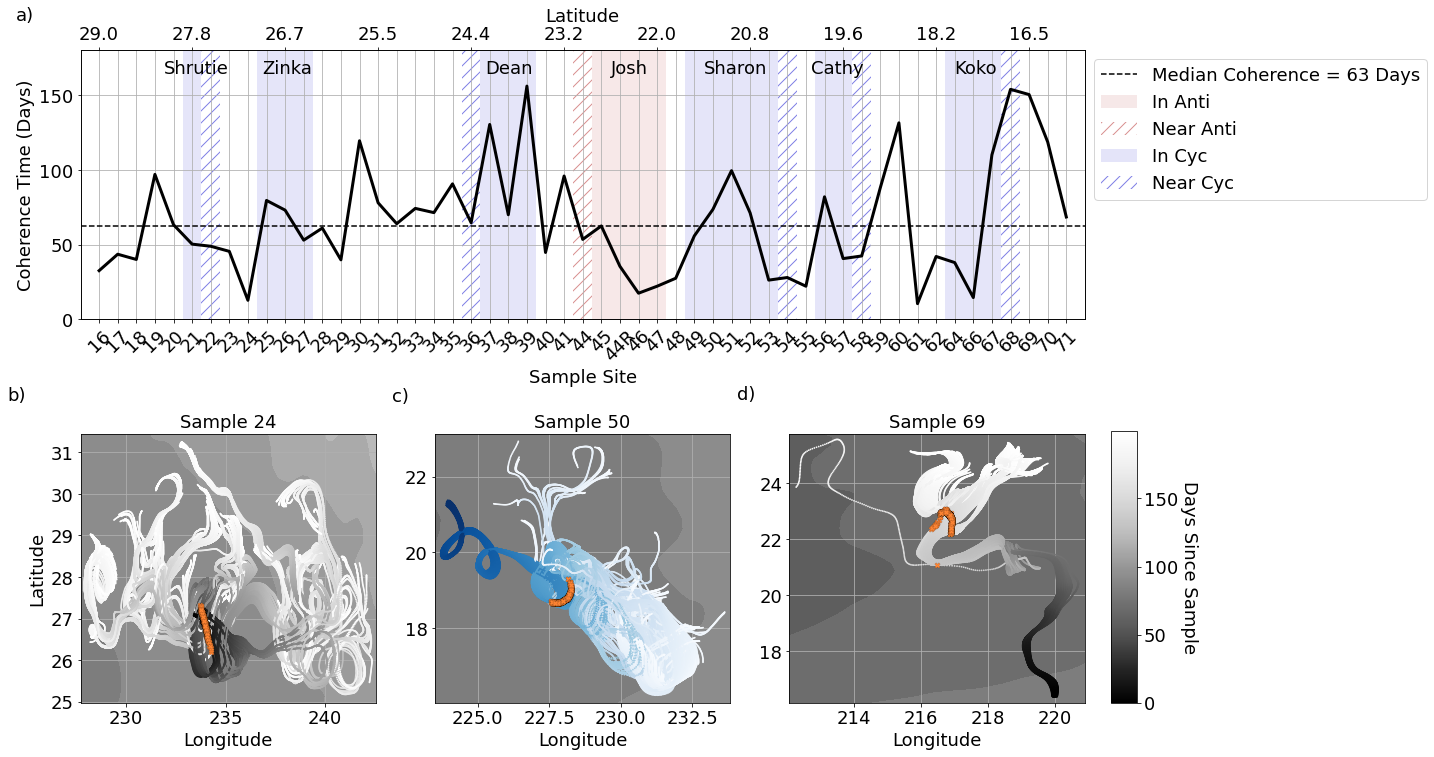

In [24]:
fig = plt.figure(figsize=(18,12))

gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])

############################ COHERENCY LINE PLOT ############################
linewidth=3

ax0.plot(coh_df.index,np.divide(coh_df.mean_coh,4),linewidth=linewidth,c='k') # convert to days

ax0.set_xticks(coh_df.index)
ax0.set_xticklabels(coh_df.index,rotation=45)
ax0.grid(True)

overall_median = np.median(np.divide(coh_df.mean_coh,4))
ax0.axhline(overall_median,linestyle='--',label='Median Coherence = %s Days'%(round(overall_median)),c='k')
ax0.set_ylabel('Coherence Time (Days)')
ax0.set_xlabel('Sample Site')
ymin,ymax = 0,180
ax0.set_ylim([ymin,ymax])
ax0.set_xlim([-1,53])

# Twin ax to label Latitude
ax0b = ax0.twiny()
ax0b.set_xlim(ax0.get_xlim())
ax0b.set_xticks(np.arange(0,53,5))
ax0b.set_xticklabels([str(round(i,1)) for i in metadata_df.latitude][::5])
ax0b.set_xlabel('Latitude')

###### EDDY SHADING ##### 

eddy_type_dict = {'in_anti':['firebrick','x','In Anti'],
                  'near_anti':['firebrick','//','Near Anti'],
                  'in_cyc':['mediumblue','x','In Cyc'],
                  'near_cyc':['mediumblue','//','Near Cyc']}

in_cyc_trigger,near_cyc_trigger=0,0
for eddy_type,values in eddy_type_dict.items():
    eddy_ids = np.unique(metadata_df.iloc[np.where(metadata_df[eddy_type] != 0)[0]][eddy_type])
    
    for ID in eddy_ids:
        inds = np.where([metadata_df[eddy_type] == ID])[1]
        
        if (eddy_type == 'in_anti'):
            ax0.fill_between([inds[0]-0.5,inds[-1]+0.5],ymin,y2=ymax, 
                                facecolor=values[0],alpha=0.1,linewidth=0,label=values[2])
        elif (eddy_type == 'in_cyc'):
            if in_cyc_trigger != 1:
                label=values[2]
            else:
                label=None
            ax0.fill_between([inds[0]-0.5,inds[-1]+0.5],ymin,y2=ymax, 
                    facecolor=values[0],alpha=0.1,linewidth=0,label=label)
            in_cyc_trigger = 1
        elif (eddy_type == 'near_anti'):
            for i in np.arange(0,len(inds)):
                ax0.fill_between([inds[i]-0.5,inds[i]+0.5],ymin,y2=ymax,hatch=values[1], 
                            facecolor='none', edgecolor=values[0],alpha=0.5,linewidth=0,label=values[2])
        elif (eddy_type == 'near_cyc'):
            for i in np.arange(0,len(inds)):
                if near_cyc_trigger != 1:
                    label=values[2]
                else:
                    label=None
                ax0.fill_between([inds[i]-0.5,inds[i]+0.5],ymin,y2=ymax,hatch=values[1], 
                            facecolor='none', edgecolor=values[0],alpha=0.5,linewidth=0,label=label)
                near_cyc_trigger=1

# Label eddies
eddy_ypos = 165
ax0.text(3.5,eddy_ypos,'Shrutie')
ax0.text(8.75,eddy_ypos,'Zinka')
ax0.text(20.75,eddy_ypos,'Dean')
ax0.text(27.5,eddy_ypos,'Josh')
ax0.text(32.5,eddy_ypos,'Sharon')
ax0.text(38.25,eddy_ypos,'Cathy')
ax0.text(46,eddy_ypos,'Koko')

ax0.legend(bbox_to_anchor=(1,1))

############################ TRAJECTORY PLOTs ############################

sample_ax = {'24':[ax1,'Greys_r'],'50':[ax2,'Blues_r'],'69':[ax3,'Greys_r']}
for sample,values in sample_ax.items():
    a = values[0]
    color = values[1]
    plot,lat_lims,lon_lims = cmems_traj_plot_w_coh(a,sample,1,200,color)
    a.set_xlim(lon_lims)
    a.set_ylim(lat_lims)
    a.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
    adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)
    a.set_title('Sample %s'%(sample))
    a.set_ylabel('')

ax1.set_ylabel('Latitude')

cb_ax = fig.add_axes([0.92, 0.125, 0.02, 0.315]) # [left, bottom, width, height]
cbar = fig.colorbar(plot, cax=cb_ax)
cb_ax.tick_params(axis='both', labelsize=fontsize)
cb_ax.set_ylabel('Days Since Sample',rotation=270,labelpad=20)    

############################ PARAMS ############################
ax0.text(-4.5,200,'a)')
ax1.text(224,32.25,'b)')
ax2.text(222,24,'c)')
ax3.text(210.5,27,'d)')

plt.subplots_adjust(hspace=0.425)

#plt.savefig(data_dir + 'G4_traj_paper_figs/coherence_time_w_examples.png',dpi=350,bbox_inches='tight')

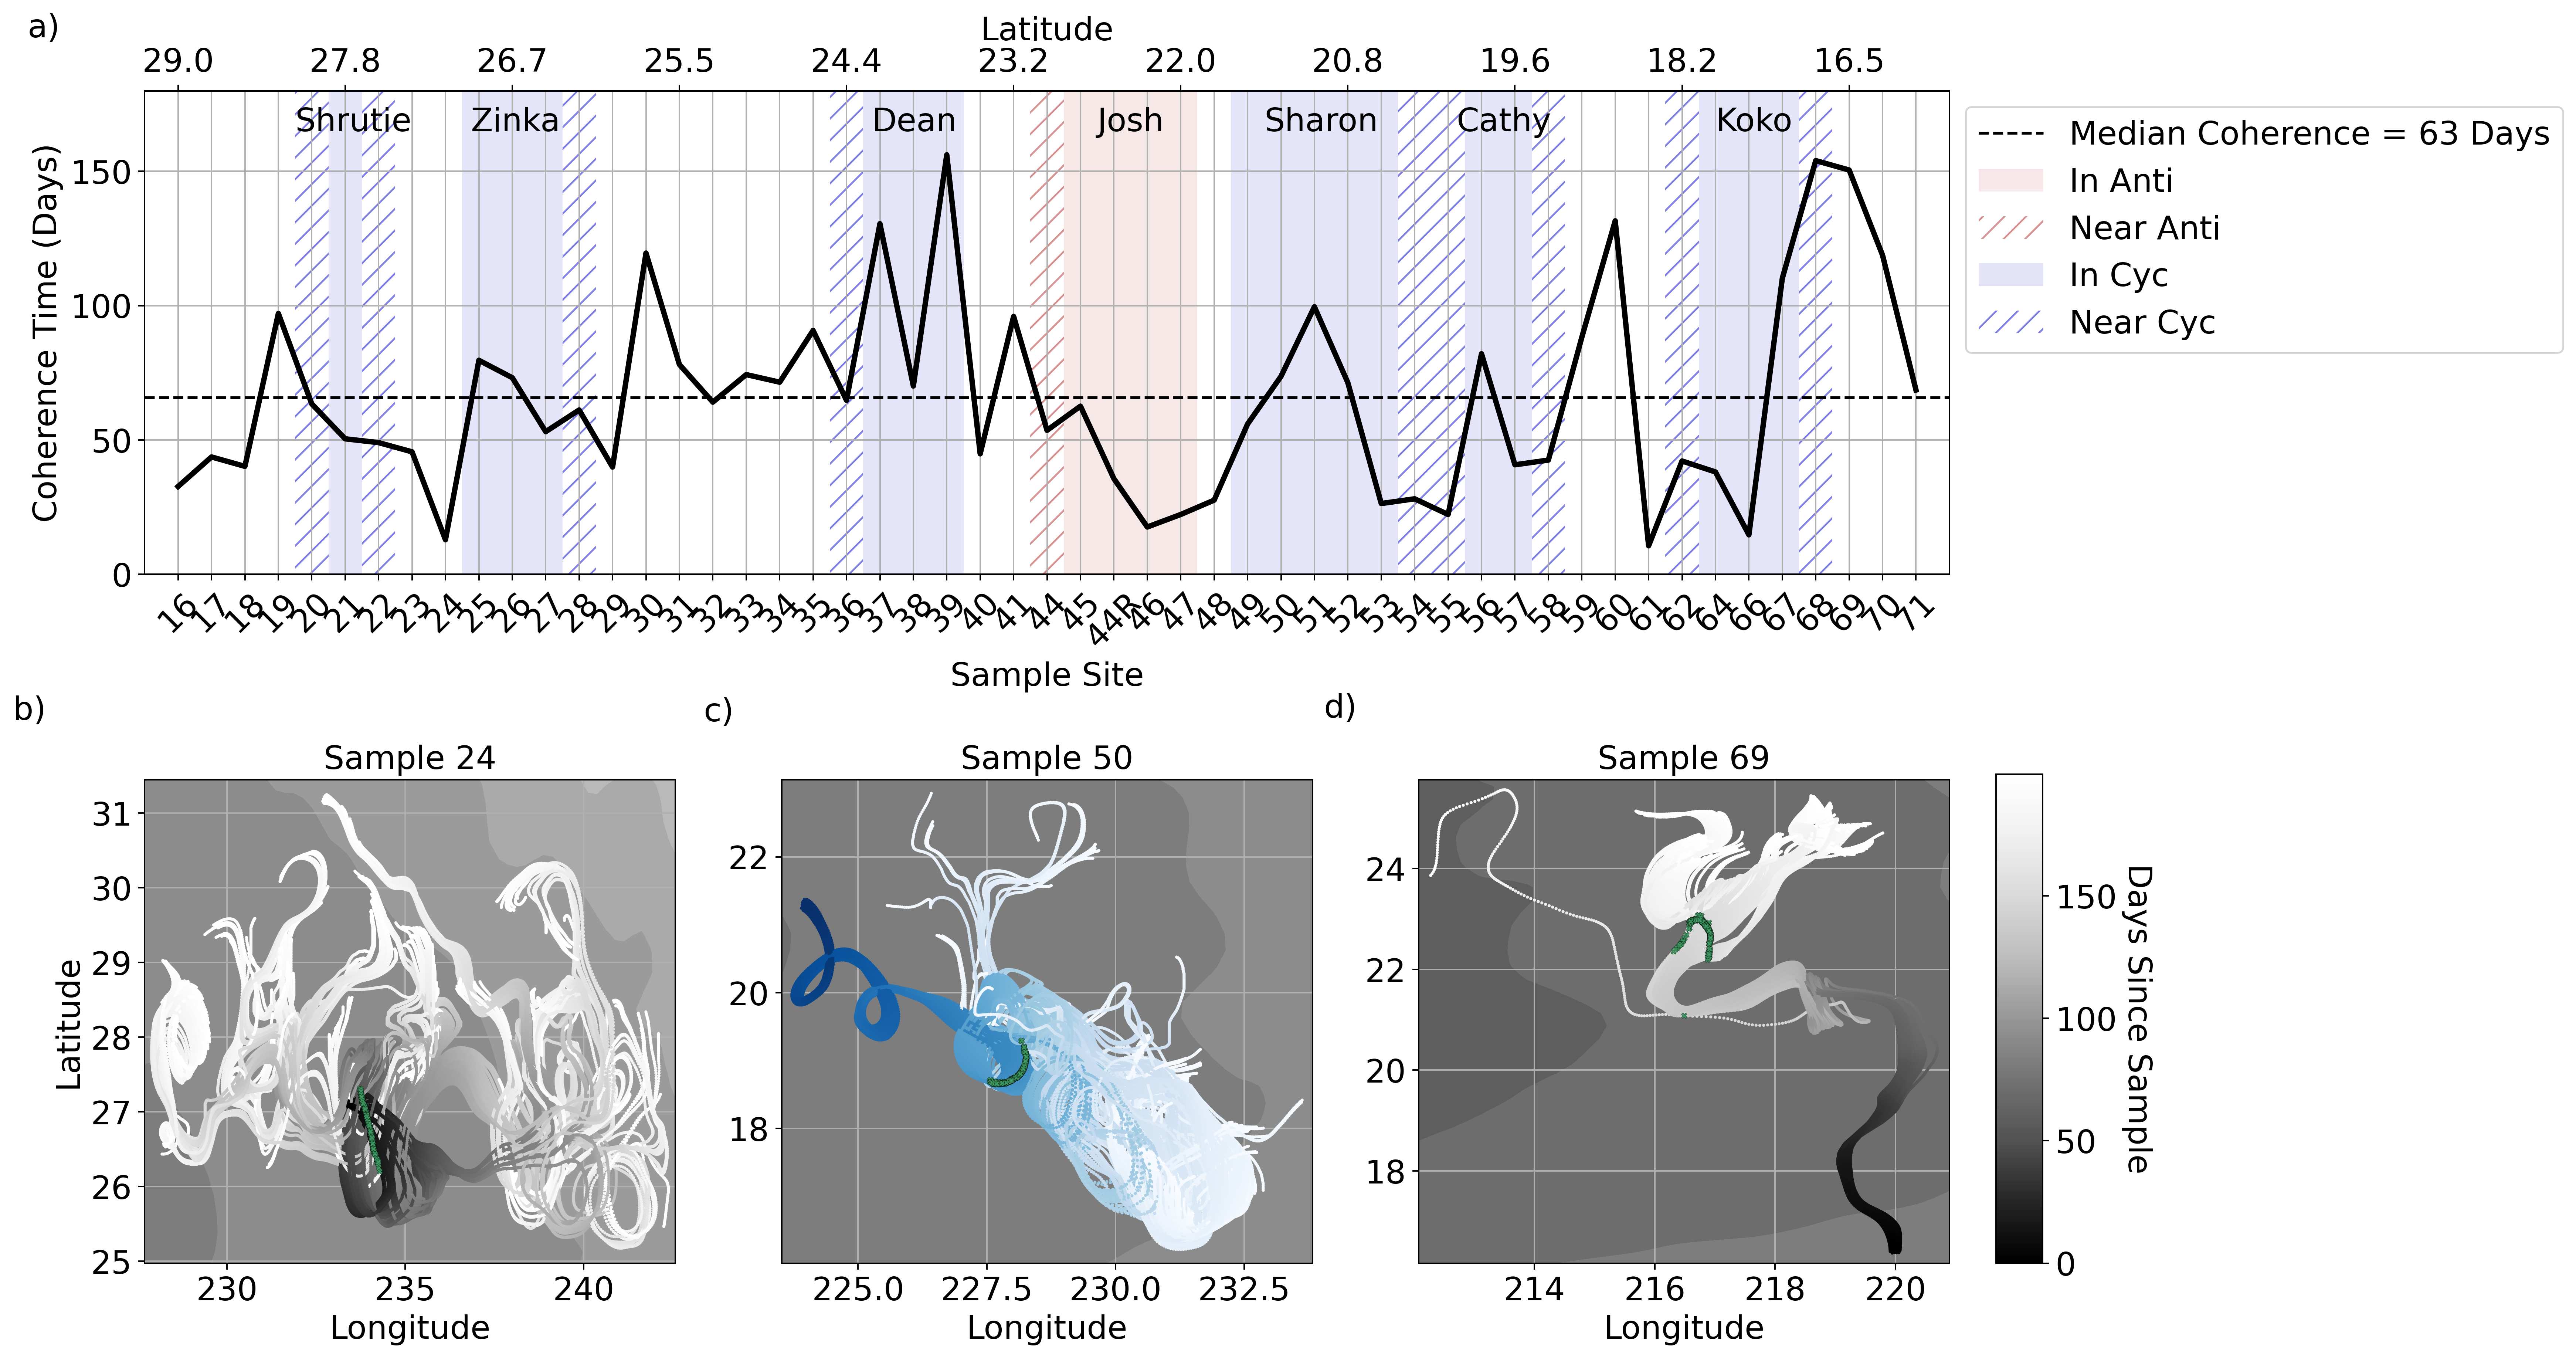

In [25]:
Image(filename=data_dir + 'G4_traj_paper_figs/coherence_time_w_examples.png') 

### Paper Version

Vertical orientation

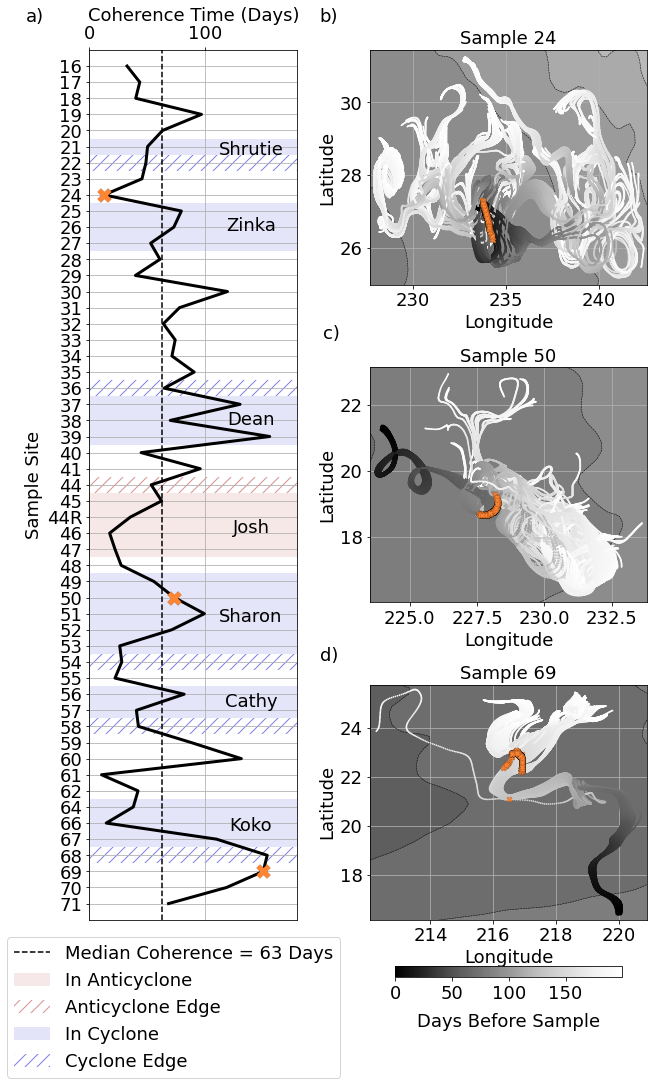

In [26]:
fig = plt.figure(figsize=(10,16)) 
plt.subplots_adjust(wspace=0.3)

gs = fig.add_gridspec(3,2, width_ratios=[1.5, 2])
ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])

############################ COHERENCY LINE PLOT ############################
linewidth=3

ax0.plot(np.divide(coh_df.mean_coh,4),coh_df.index,linewidth=linewidth,c='k') # convert to days
ax0.set_yticks(coh_df.index)
ax0.set_yticklabels(coh_df.index)
ax0.grid(True)



for sample_example in ['24','50','69']:
    ax0.scatter(np.divide(coh_df.loc[sample_example]['mean_coh'],4),np.where(coh_df.index == sample_example)[0][0],
                c='#ff8533',marker='X',s=200,edgecolor='k',linewidth=0.1,zorder=10)

overall_median = np.median(np.divide(coh_df.mean_coh,4))
ax0.axvline(overall_median,linestyle='--',label='Median Coherence = %s Days'%(round(overall_median)),c='k')

ax0.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False) # Move x-axis ticks to the top
ax0.xaxis.set_label_position('top')
ax0.set_xlabel('Coherence Time (Days)')

ax0.set_ylabel('Sample Site')
xmin,xmax = 0,180
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([-1,53])

# Twin ax to label Latitude
#ax0b = ax0.twinx()
#ax0b.set_ylim(ax0.get_ylim())
#ax0b.set_yticks(np.arange(0,53,5))
#ax0b.set_yticklabels([str(round(i,1)) for i in metadata_df.latitude][::5])
#ax0b.set_ylabel('Latitude')

############################ EDDY SHADING ############################

eddy_type_dict = {'in_anti':['firebrick','x','In Anticyclone'],
                  'near_anti':['firebrick','//','Anticyclone Edge'],
                  'in_cyc':['mediumblue','x','In Cyclone'],
                  'near_cyc':['mediumblue','//','Cyclone Edge']}

in_cyc_trigger,near_cyc_trigger=0,0
for eddy_type,values in eddy_type_dict.items():
    eddy_ids = np.unique(metadata_df.iloc[np.where(metadata_df[eddy_type] != 0)[0]][eddy_type])
    
    for ID in eddy_ids:
        inds = np.where([metadata_df[eddy_type] == ID])[1]
        
        if (eddy_type == 'in_anti'):
            ax0.fill_between([xmin,xmax],inds[0]-0.5,y2=inds[-1]+0.5,
                                facecolor=values[0],alpha=0.1,linewidth=0,label=values[2])
        elif (eddy_type == 'in_cyc'):
            if in_cyc_trigger != 1:
                label=values[2]
            else:
                label=None
            ax0.fill_between([xmin,xmax],inds[0]-0.5,y2=inds[-1]+0.5,
                    facecolor=values[0],alpha=0.1,linewidth=0,label=label)
            in_cyc_trigger = 1
        elif (eddy_type == 'near_anti'):
            for i in np.arange(0,len(inds)):
                ax0.fill_between([xmin,xmax],inds[i]-0.5,y2=inds[i]+0.5,hatch=values[1], 
                            facecolor='none', edgecolor=values[0],alpha=0.5,linewidth=0,label=values[2])
        elif (eddy_type == 'near_cyc'):
            for i in np.arange(0,len(inds)):
                if near_cyc_trigger != 1:
                    label=values[2]
                else:
                    label=None
                ax0.fill_between([xmin,xmax],inds[i]-0.5,y2=inds[i]+0.5,hatch=values[1], 
                            facecolor='none', edgecolor=values[0],alpha=0.5,linewidth=0,label=label)
                near_cyc_trigger=1

# Label eddies
eddy_xpos = 140
ax0.text(eddy_xpos,5.5,'Shrutie',horizontalalignment='center')
ax0.text(eddy_xpos,10.25,'Zinka',horizontalalignment='center')
ax0.text(eddy_xpos,22.25,'Dean',horizontalalignment='center')
ax0.text(eddy_xpos,29,'Josh',horizontalalignment='center')
ax0.text(eddy_xpos,34.5,'Sharon',horizontalalignment='center')
ax0.text(eddy_xpos,39.75,'Cathy',horizontalalignment='center')
ax0.text(eddy_xpos,47.5,'Koko',horizontalalignment='center')

ax0.legend(bbox_to_anchor=(1.25,-0.01)) #(x,y)

ax0.invert_yaxis()

############################ TRAJECTORY PLOTs ############################

#sample_ax = {'24':[ax1,'Greys_r'],'50':[ax2,'Blues_r'],'69':[ax3,'Greys_r']}
sample_ax = {'24':[ax1,'Greys_r'],'50':[ax2,'Greys_r'],'69':[ax3,'Greys_r']} # Making all the same color

for sample,values in sample_ax.items():
    a = values[0]
    color = values[1]
    plot,lat_lims,lon_lims = cmems_traj_plot_w_coh(a,sample,1,200,color)
    a.set_xlim(lon_lims)
    a.set_ylim(lat_lims)
    a.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
    adt_plot = a.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                                colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)
    a.set_title('Sample %s'%(sample))

cb_ax = fig.add_axes([0.55, 0.075, 0.315, 0.01]) # [left, bottom, width, height]
cbar = fig.colorbar(plot, cax=cb_ax, orientation='horizontal')
cb_ax.tick_params(axis='both', labelsize=fontsize)
cb_ax.set_xlabel('Days Before Sample',labelpad=10)

############################ PARAMS ############################
ax0.text(-55,-2.75,'a)')
ax1.text(225,32.21,'b)')
ax2.text(221.75,24,'c)')
ax3.text(210.5,26.75,'d)')

plt.subplots_adjust(hspace=0.35)

plt.savefig(data_dir + 'G4_traj_paper_figs/coherence_time_w_examples_vertical_v3.png',dpi=350,bbox_inches='tight')
#plt.savefig(data_dir + 'G4_traj_paper_figs/coherence_time_w_examples_vertical_v2.pdf',bbox_inches='tight',pad_inches=0,dpi=350,format='pdf') # Not working :(

### Compare CMEMS & OSCAR trajectories

NOTE: Need to run CMEMS & OSCAR with same initial clouds as CMEMS

In [27]:
def traj_plot(dataset,a,sample_site,skip,day_cutoff,cmap):
    """
    dataset: 'cmems','oscar'
    a: axis
    sample_site: string
    skip: determines number of trajectories to plot; e.g., skip = 10 will plot 100 trajs
    day_cutoff: how many days to plot?
    cmap: color scheme
    """

    if dataset == 'cmems':
        cmems_file_path = data_dir + 'parcels_trajs/gaussian_seeding_sample_sites/CMEMS_runs/samplesite%s_200day_backward_runtime_20min_timestep_6hr_output_freq_1000_gaussian_particles_0.025_std_dist_cmems.nc'%(sample_site)
        ds = xr.open_dataset(cmems_file_path)

    if dataset == 'oscar':
        oscar_file_path = data_dir + 'parcels_trajs/gaussian_seeding_sample_sites/OSCAR_final_runs/samplesite%s_200day_backward_runtime_20min_timestep_6hr_output_freq_1000_gaussian_particles_0.025_std_dist_oscar_final_run3.nc'%(sample_site)
        ds = xr.open_dataset(oscar_file_path)
        
    traj_lats,traj_lons,traj_times = [],[],[]
    for i in np.arange(0,len(ds.lat),skip):
        traj_lats.append(np.array(ds.lat[i])[:(day_cutoff*4)+1]) 
        traj_lons.append(np.array(ds.lon[i])[:(day_cutoff*4)+1])
        if i == 0: # times are the same for the set of trajs
            traj_times = np.array(ds.time[i])[:(day_cutoff*4)+1]
            
    # Create figure
    for l in np.arange(0,len(traj_lats)):
        plot = a.scatter(traj_lons[l],traj_lats[l],c=np.arange(0,day_cutoff,day_cutoff/len(traj_times)),
                         s=0.5,cmap=cmap,zorder=2)
    
    return plot

Text(213, 34, 'a) Geostrophy')

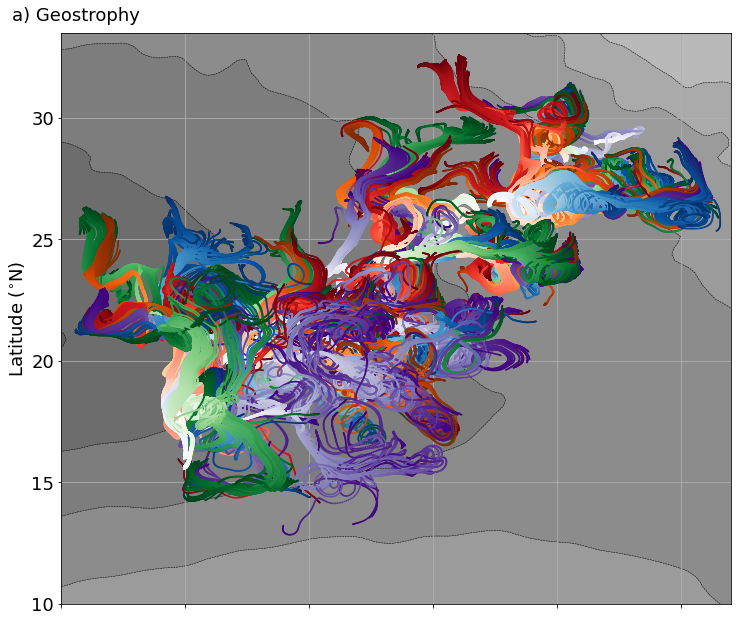

In [28]:
fig,ax = plt.subplots(1,1,figsize=(12,10.5))

cmaps = ['Purples','Blues','Greens','Oranges','Reds']
counter = 0
for i in metadata_df['sample_id']:
    traj_plot('cmems',ax,i,10,150,cmaps[counter])
    
    # cycle through the cmaps
    if counter < 4: 
        counter += 1
    else:
        counter = 0
        
ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)
        
ax.grid(zorder=10) # Turn on grid lines
ax.set_xlim([215,242])
#ax.set_ylim([12.5,33])
ax.set_ylim([10,33.5])

ax.set_ylabel('Latitude ($^{\circ}$N)')
#ax.set_xlabel('Longitude')
ax.set_xticklabels([])
ax.text(213,34,'a) Geostrophy')

#plt.savefig(data_dir + 'G4_traj_paper_figs/cmems_trajs_all_gaussian_clouds.png',dpi=350,bbox_inches='tight',format='png')

Text(213, 34, 'b) Geostrophy + Ekman')

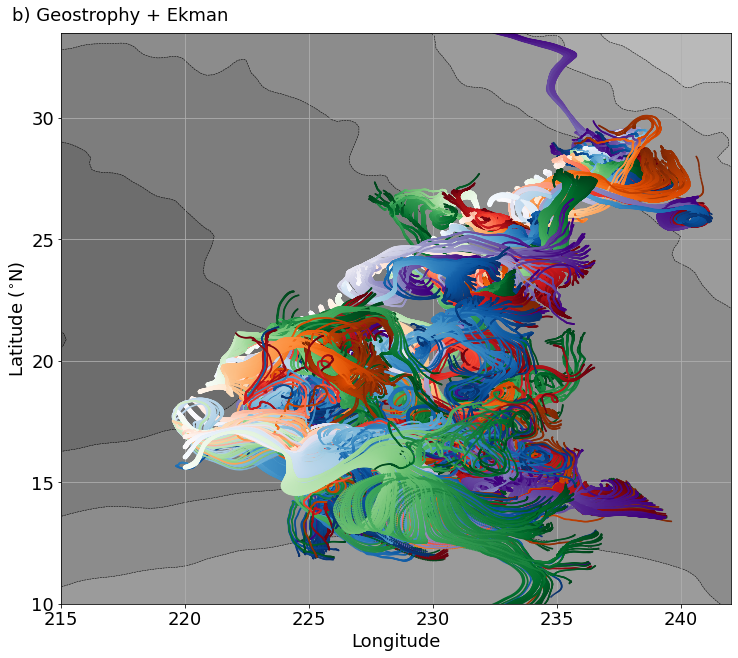

In [29]:
fig,ax = plt.subplots(1,1,figsize=(12,10.5))

cmaps = ['Purples','Blues','Greens','Oranges','Reds']
counter = 0
for i in metadata_df['sample_id']:
    traj_plot('oscar',ax,i,10,150,cmaps[counter])
    
    # cycle through the cmaps
    if counter < 4: 
        counter += 1
    else:
        counter = 0
        
ax.contourf(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            cmap='binary',vmin=0.15,vmax=1.5,levels=40,zorder=0)
adt_plot = ax.contour(sample_sla.longitude,sample_sla.latitude,ADT_avg,
                            colors='k',linestyles='dashed',linewidths=0.5,vmin=0.15,vmax=1.5,levels=40,zorder=1)
        
ax.grid(zorder=10) # Turn on grid lines
ax.set_xlim([215,242])
#ax.set_ylim([12.5,33])
ax.set_ylim([10,33.5])

ax.set_ylabel('Latitude ($^{\circ}$N)')
ax.set_xlabel('Longitude')
ax.text(213,34,'b) Geostrophy + Ekman')
    
#plt.savefig(data_dir + 'G4_traj_paper_figs/oscar_trajs_all_gaussian_clouds.png',dpi=350,bbox_inches='tight',format='png')